The Lorenz equations
==========


$$ \dot{X} = \sigma(Y-X) $$
$$ \dot{Y} = rX-Y-XZ $$
$$ \dot{Z} = XY-bZ $$


In [16]:
import numpy as np
from scipy import integrate
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['figure.figsize'] = (10,10)


In [17]:
def rhs(t, y, sigma=10, r=28, b=8/3):
    X, Y, Z = y
    return [sigma*(Y-X), r*X-Y-X*Z, X*Y-b*Z]

In [18]:
def rhs(t, y, sigma=10, r=28, b=8/3):
    X, Y, Z = y
    return [sigma*(Y-X), r*X-Y-X*Z, X*Y-b*Z]

In [19]:
y0 = (1,1,1)
t0, t1 = 0, 100
dt_out = 0.01

m = {'sigma':10,'r':28,'b':8/3}
r = integrate.ode( lambda t,y: rhs(t,y,**m)  )

ys = []
def solout(t,y):
    ys.append([t, *y])

r.set_integrator('dopri5')
r.set_initial_value(y0, t0);


In [22]:
while r.successful() and r.t < t1:
    solout(r.t+dt_out, r.integrate(r.t + dt_out))

ys = np.array(ys)

<IPython.core.display.Javascript object>


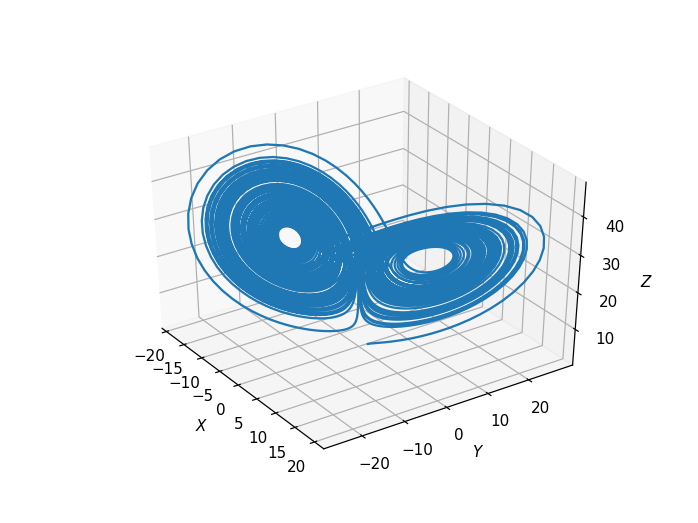

In [27]:
%matplotlib notebook
   
ax = mpl.pyplot.figure().gca(projection='3d')
ax.plot( ys[:,1], ys[:,2], ys[:,3] )

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

mpl.pyplot.show()